In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/KaggleKaggelan/aboModel-main1'
!ls "/content/drive/MyDrive/KaggleKaggelan/aboModel-main1"

bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
apple_dir = os.path.join(bahan_dir, 'apple/')
banana_dir = os.path.join(bahan_dir, 'banana/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar apple :', len(os.listdir(apple_dir)))
print('Jumlah gambar banana :', len(os.listdir(banana_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar apple : 50
Jumlah gambar banana : 50


In [ ]:
train_apple = os.path.join(train_dir, 'apple/')
train_banana = os.path.join(train_dir, 'banana/')

validation_apple = os.path.join(validation_dir, 'apple/')
validation_banana = os.path.join(validation_dir, 'banana/')

In [ ]:
import random
import os
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    print(f'Total size: {total_size}')

    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    clear_folder(train)
    clear_folder(val)

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

def clear_folder(folder):

    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

train_ratio = 0.9

source_00 = apple_dir
train_00 = train_apple
val_00 = validation_apple
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = banana_dir
train_01 = train_banana
val_01 = validation_banana
train_val_split(source_01, train_01, val_01, train_ratio)

Total size: 50
Total size: 50


In [ ]:
print('Jumlah All apple   :', len(os.listdir(apple_dir)))
print('Jumlah Train apple :', len(os.listdir(train_apple)))
print('Jumlah Val apple   :', len(os.listdir(validation_apple)))

Jumlah All apple   : 50
Jumlah Train apple : 45
Jumlah Val apple   : 5


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range= 30,
                    horizontal_flip= True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range= 30,
                    horizontal_flip= True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callback = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 9,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callback]
)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.6258 - loss: 0.6654 - val_accuracy: 1.0000 - val_loss: 0.2057
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step - accuracy: 0.9951 - loss: 0.1642 - val_accuracy: 1.0000 - val_loss: 0.0390
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - accuracy: 0.9706 - loss: 0.0705 - val_accuracy: 1.0000 - val_loss: 2.8610e-07
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 1.0000 - loss: 1.2914e-04
Akurasi mencapai 99%
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 1.0000 - loss: 1.6348e-04 - val_accuracy: 1.0000 - val_loss: 3.0217e-04


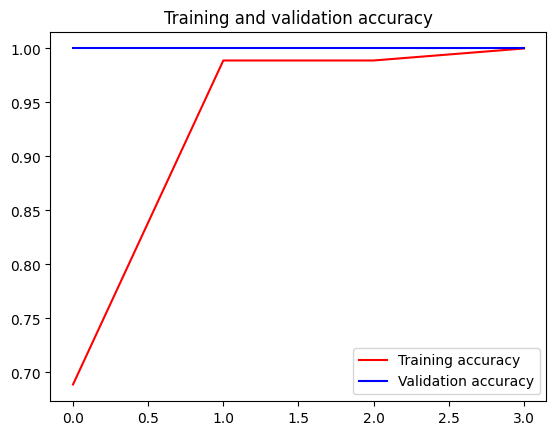

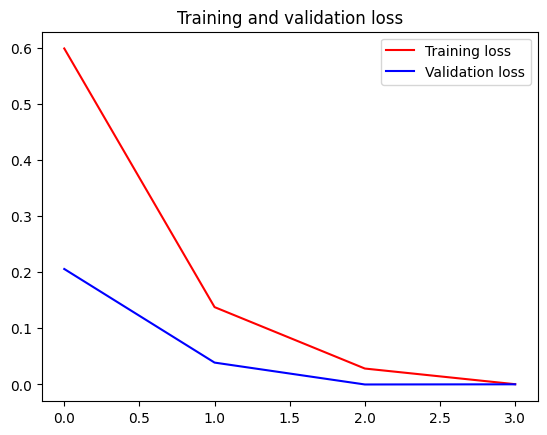

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')
plt.show()

Saving bananana.jpg to bananana (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
bananana (3).jpg
This image is predicted as: banana


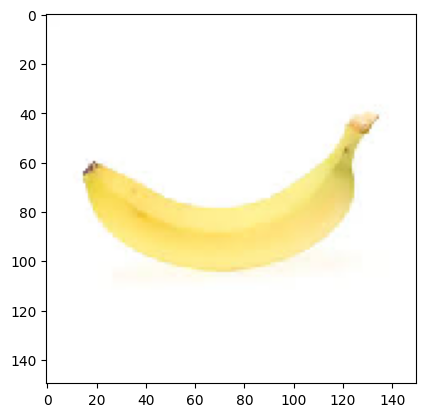

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    class_list = os.listdir(train_dir)

pred_class_index = np.argmax(classes)
pred_class = class_list[pred_class_index]
print(f"This image is predicted as: {pred_class}")
